# Parameter sweeps - Analysis

This notebook reads the output of `07_cluster_stats_sweeps.ipynb` and generates several plots as part of the analysis of results.

## Configuration

We need to define the name (or label) of the parameter sweeps experiments, as well as the path to access the results.

In [1]:
LABEL          = 'sweeps-sampling-size'
RESULTS_PATH   = '../results'

And we have some standard packages to read the files and analize the data.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

## Input files and observation data

Let's read all the experiment data and save it into a `results` dataframe.

In [3]:
# Locate output directory
results_dir = os.path.join( os.path.abspath(RESULTS_PATH), LABEL )
if os.path.exists( results_dir ):
    print( '... results directory found.' )
else:
    print( '... results directory not found.' )
    raise

# Identify the relevant experiment result files
output_prefix = results_dir + '/' + LABEL
output_files = [ filename for filename in os.listdir(results_dir) if filename.startswith(LABEL + '-parameter-sweep-results--experiment-') ]
print( '... ', len(output_files), ' result files found' )

# Load data into dataframe
results = pd.DataFrame()
columns_to_keep = [ 'reff', 'sampling_rate', 'cutoff', 'n_clusters',
       'cluster_size_mean', 'cluster_size_cov', 'weighted_cluster_size_mean',
       'weighted_cluster_size_cov', 'sim_time', 'mean_partner',
       'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay',
       'execution_time', 'samplesize', 'experiment_id']
for i, file in enumerate(output_files):
    if (i%10 == 0):
        print( '... processing file ', i+1, '/', len(output_files) )
    if pd.read_csv( results_dir + '/' + file ).empty:
        print( '... ', results_dir + '/' + file, ' is empty' )
    else:
        results_this_file = pd.read_csv( results_dir + '/' + file )     \
                          .loc[:,columns_to_keep]                   \
                          .groupby( ['sampling_rate','cutoff'] )    \
                          .mean()                                   \
                          .reset_index()
    
        results = pd.concat( [results, results_this_file], ignore_index=True )

... results directory found.
...  24  result files found
... processing file  1 / 24
...  /home/rnunez/work/clustersim/dev/20230720-with-phylomodels/results/sweeps-sampling-size/sweeps-sampling-size-parameter-sweep-results--experiment-5.csv  is empty
...  /home/rnunez/work/clustersim/dev/20230720-with-phylomodels/results/sweeps-sampling-size/sweeps-sampling-size-parameter-sweep-results--experiment-17.csv  is empty
...  /home/rnunez/work/clustersim/dev/20230720-with-phylomodels/results/sweeps-sampling-size/sweeps-sampling-size-parameter-sweep-results--experiment-11.csv  is empty
... processing file  11 / 24
...  /home/rnunez/work/clustersim/dev/20230720-with-phylomodels/results/sweeps-sampling-size/sweeps-sampling-size-parameter-sweep-results--experiment-23.csv  is empty
... processing file  21 / 24


In [4]:
results

,sampling_rate,cutoff,reff,n_clusters,cluster_size_mean,cluster_size_cov,weighted_cluster_size_mean,weighted_cluster_size_cov,sim_time,mean_partner,acts_per_day,lambda,removal_rate,sampling_delay,execution_time,samplesize,experiment_id
0,0.04,730,2.591060,19.2,7.655900,3.076110,81.621689,0.823594,7300.0,0.35,0.1,0.001,0.0005,180.0,588.574253,1000.0,21.0
1,0.04,1825,2.591060,13.4,19.678281,3.036817,196.306648,0.855633,7300.0,0.35,0.1,0.001,0.0005,180.0,588.574253,1000.0,21.0
2,0.04,2555,2.591060,11.0,28.418803,2.826460,241.641061,0.845917,7300.0,0.35,0.1,0.001,0.0005,180.0,588.574253,1000.0,21.0
3,0.06,730,2.591060,26.8,6.563721,3.233388,76.231548,0.837898,7300.0,0.35,0.1,0.001,0.0005,180.0,588.574253,1000.0,21.0
4,0.06,1825,2.591060,16.6,17.993269,3.322927,210.634298,0.845634,7300.0,0.35,0.1,0.001,0.0005,180.0,588.574253,1000.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0.98,1825,4.200094,55.8,11.530172,5.591909,372.611426,0.922198,7300.0,0.35,0.1,0.001,0.0005,180.0,217.731035,500.0,20.0
2936,0.98,2555,4.200094,29.2,22.363333,4.623849,497.942210,0.891227,7300.0,0.35,0.1,0.001,0.0005,180.0,217.731035,500.0,20.0
2937,1.00,730,4.200094,146.2,4.078190,3.952549,74.050473,0.942790,7300.0,0.35,0.1,0.001,0.0005,180.0,217.731035,500.0,20.0
2938,1.00,1825,4.200094,56.6,11.590697,5.624789,378.241579,0.918492,7300.0,0.35,0.1,0.001,0.0005,180.0,217.731035,500.0,20.0


And here is the observation data:

In [5]:
pangea_data = pd.DataFrame( [ [ 'HIVDRD, UK'         , 'firebrick' , 3.4 , 1.5 , 11   , 2   , 0.7 , 1.5    ],
                              [ 'PopART, Zambia'     , 'blue'      , 2.27, 0.29,  2.46, 0.39, 0.16, 3.19   ],
                              [ 'Rakai, Uganda'      , 'dodgerblue', 2.33, 0.30,  2.55, 0.36, 0.23, 3.27   ],
                              [ 'Ya Tsie, Botswana'  , 'teal'      , 2.07, 0.12,  2.10, 0.14, 0.02, 5.15   ],
                              [ 'ATHENA cohort (MSM)', 'orangered' , 4.58, 1.63, 16.78,	1.46, 0.33,	np.nan ],
                              [ 'ATHENA cohort (HET)', 'red'       , 2.67, 0.72,  4.04,	0.96, 0.19, np.nan ]
                             ],
                             columns = [ 'location',
                                         'color',
                                         'cluster size (mean)',
                                         'cluster size (CoV)',
                                         'weighted cluster size (mean)',
                                         'weighted cluster size (CoV)',
                                         'Gini coefficient', 
                                         'R0'
                                        ]
                           )

## Execution time

Let's check how long it takes to finish one simulation. This is based on the execution time of the experiments that were successfully completed, i.e., experiments that timed-out are not included/counted here. 

Text(0, 0.5, 'Percent (cumulative)')

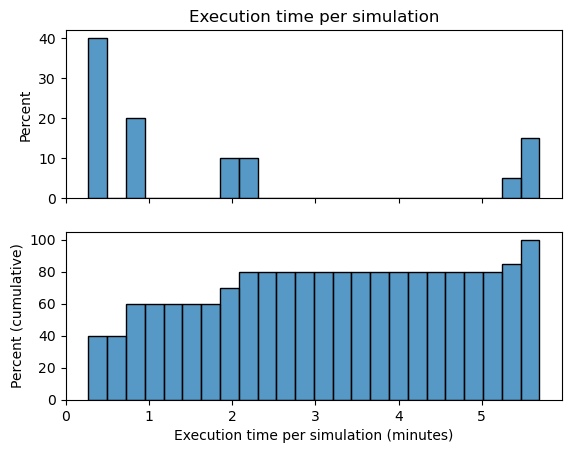

In [6]:
results['Execution time per simulation (minutes)'] = results['execution_time']/5/60

fig_time, axs_time = plt.subplots( 2, 1, sharex=True )

seaborn.histplot( results, 
                  x    = 'Execution time per simulation (minutes)', 
                  stat = 'percent',
                  ax   = axs_time[0],
                  cumulative = False,
                 )
axs_time[0].set_title( 'Execution time per simulation' )
seaborn.histplot( results, 
                  x    = 'Execution time per simulation (minutes)', 
                  stat = 'percent',
                  ax   = axs_time[1],
                  cumulative = True 
                 )
axs_time[1].set_ylabel( 'Percent (cumulative)' )

Now let's see how the execution time changes as a function of the simulation parameters

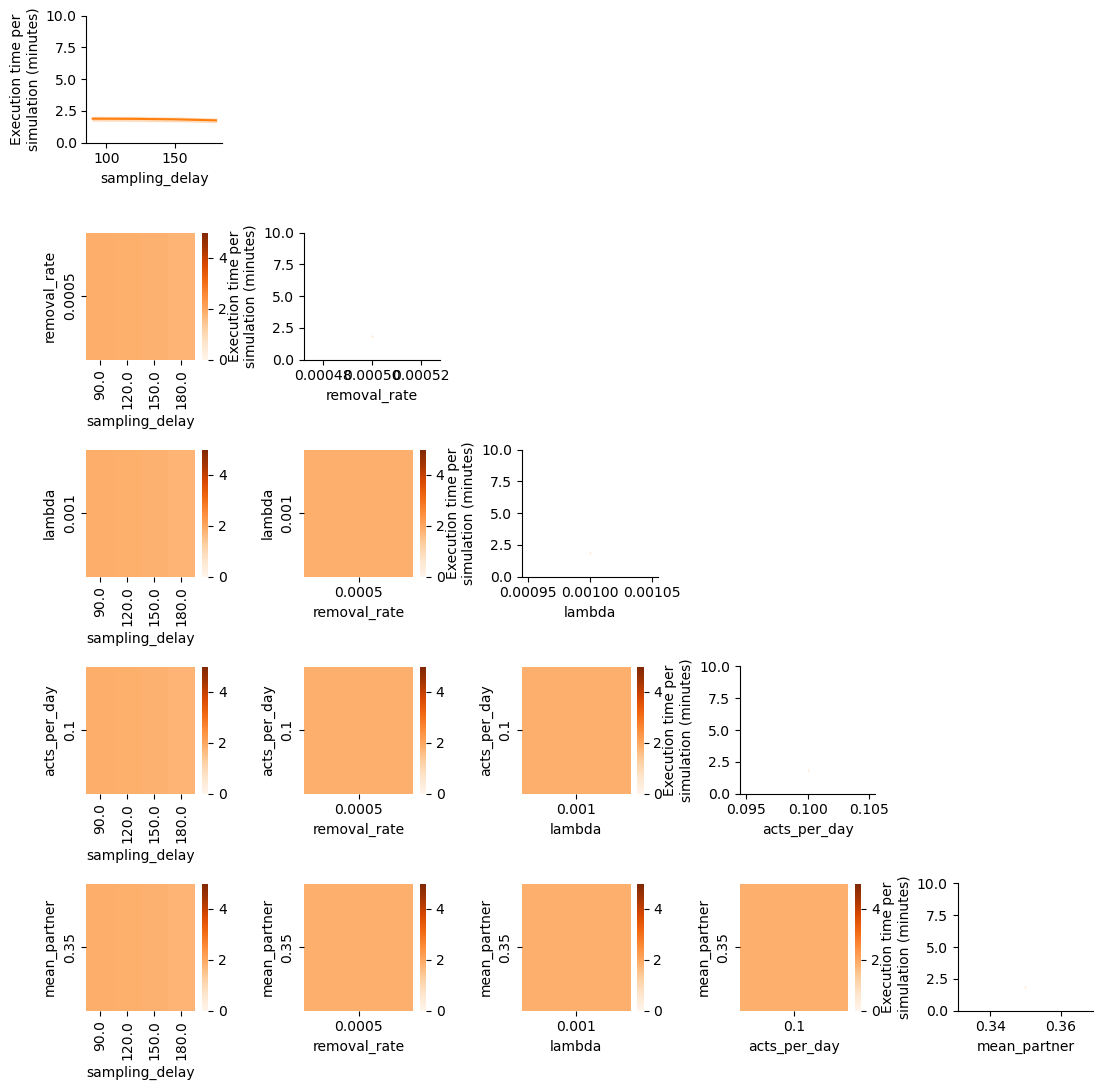

In [7]:
params = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay' ]
n = len(params)

fig_time_vs_params, axs_time_vs_params = plt.subplots( n, n, figsize=(11,11) )#, sharex=True, sharey=True )

# Nothing to do in these axes
for i in range(n):
    for j in range(i+1,n):
        import matplotlib.ticker as ticker
        seaborn.despine( ax=axs_time_vs_params[i,j], left=True, bottom=True )
        axs_time_vs_params[i,j].xaxis.set_major_locator(ticker.NullLocator())
        axs_time_vs_params[i,j].yaxis.set_major_locator(ticker.NullLocator())

# param vs time
for i, param_name in enumerate(params):
    seaborn.lineplot( results, x=param_name, y='Execution time per simulation (minutes)', ax=axs_time_vs_params[n-i-1,n-i-1], c='tab:orange' )
    seaborn.despine( ax=axs_time_vs_params[n-i-1,n-i-1] )
    axs_time_vs_params[n-i-1,n-i-1].set_ylabel( 'Execution time per\nsimulation (minutes)' )
    axs_time_vs_params[n-i-1,n-i-1].set_ylim([0,10])

# Pair plots
for i in range(n):
    for j in range(i+1,n):
        
        pairs = results[ [params[i], params[j], 'Execution time per simulation (minutes)'] ]    \
                    .groupby( [params[i], params[j]] ).mean().reset_index()
        seaborn.heatmap( pairs.pivot( index=params[i],
                                      columns = params[j],
                                      values = 'Execution time per simulation (minutes)'
                                     ),
                         vmin = 0,
                         vmax = 5,
                         cmap = 'Oranges',
                         ax   = axs_time_vs_params[n-i-1,n-j-1]
                       )
        axs_time_vs_params[n-i-1,n-j-1].invert_yaxis()
fig_time_vs_params.tight_layout()

## Clustering metrics

Let's see how things look as a function of sampling rate:

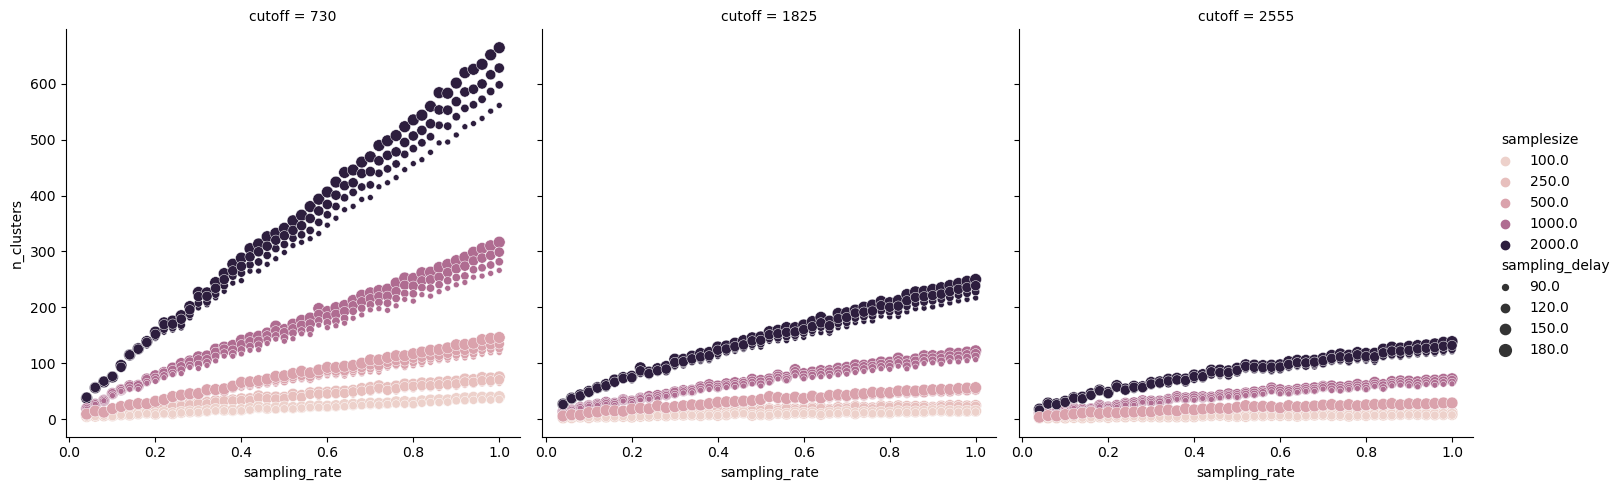

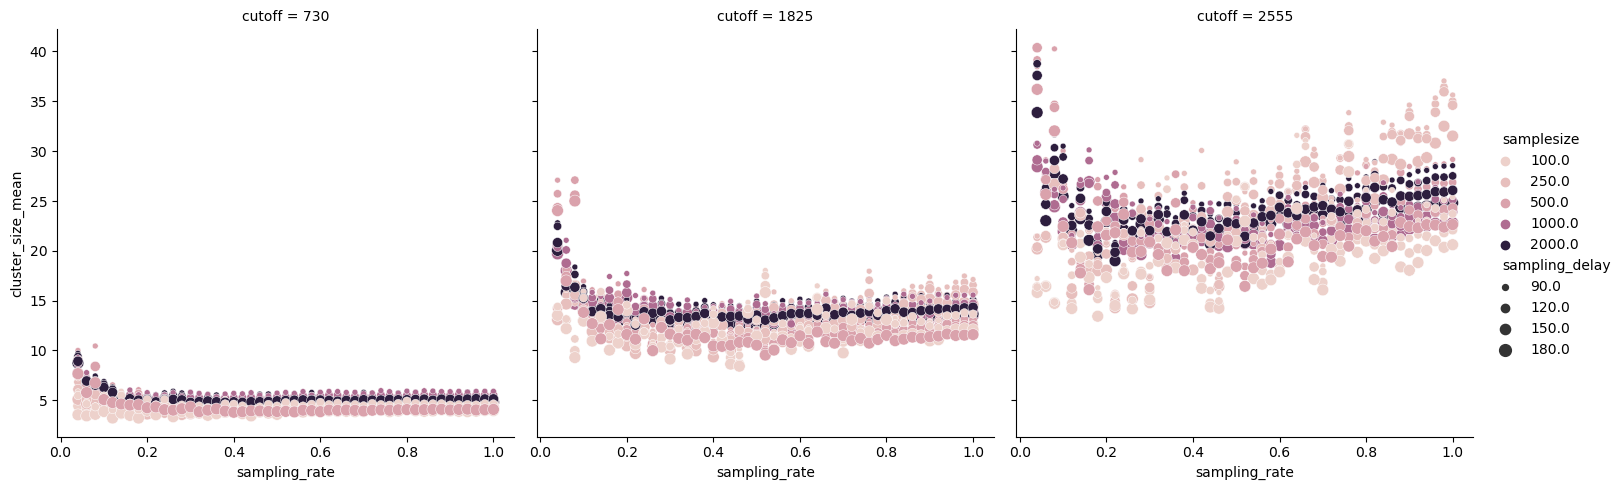

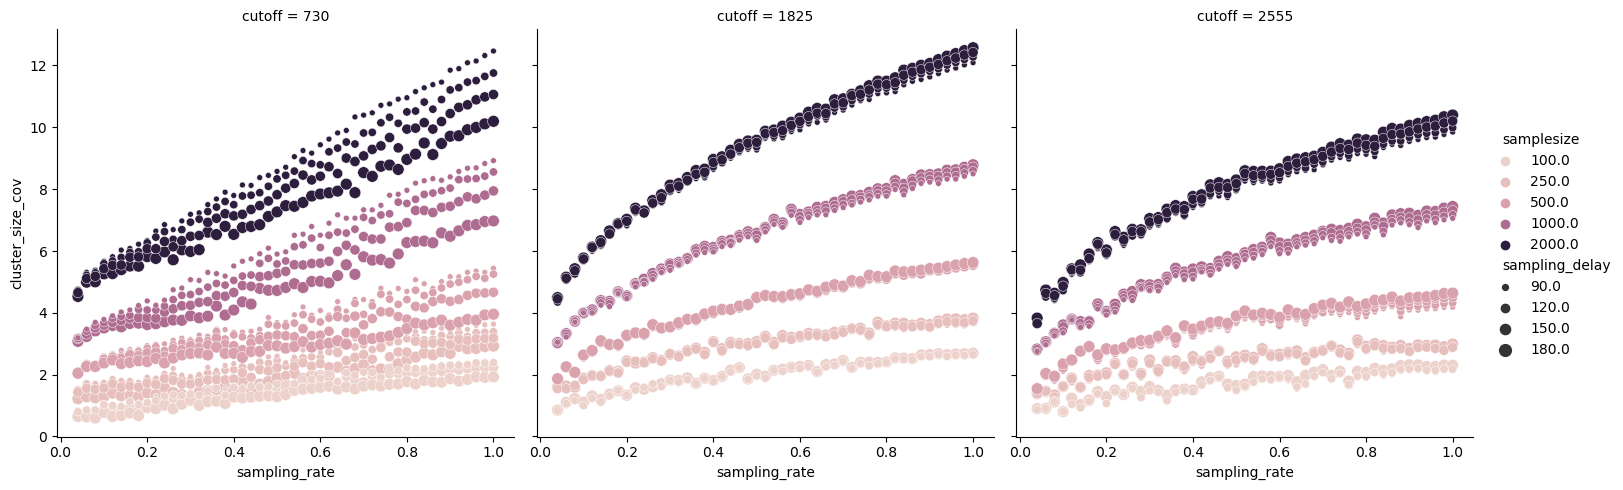

In [8]:
seaborn.relplot( results,
                 x = 'sampling_rate',
                 y = 'n_clusters',
                 hue =  'samplesize',
                 size = 'sampling_delay',
                 col = 'cutoff'
                 )

seaborn.relplot( results,
                 x = 'sampling_rate',
                 y = 'cluster_size_mean',
                 hue =  'samplesize',
                 size = 'sampling_delay',
                 col = 'cutoff'
                 )                 
seaborn.relplot( results,
                 x = 'sampling_rate',
                 y = 'cluster_size_cov',
                 hue =  'samplesize',
                 size = 'sampling_delay',
                 col = 'cutoff'
                 )

Can we identify the region of the parametric space that explains the observation data? Let's select a location of interest and see what combinations of parameters explain what we see there.

Let's start by defining a location, as well as a few plot functions.

In [9]:
location = 'PopART, Zambia'

In [10]:
def plot_params_vs_sampling_rate( results, 
                                  observation_data, 
                                  params, 
                                  cutoffs, 
                                  location, 
                                  metric_results,
                                  metric_observations
                                 ):
    ''' Plot cluster size for all parameters as a function of sampling rate '''
    
    # Initialization
    n = len(params)
    ticks_to_plot = observation_data[metric_observations].unique()
    center = observation_data[ observation_data['location']==location ][metric_observations].values
    half_range = max( center - observation_data[metric_observations].min(),
                      observation_data[metric_observations].max() - center )
    cbar_min = np.maximum( 0, np.floor( center - half_range ) )
    cbar_max = np.ceil ( center + half_range )
    
    # Draw plots
    fig, axs = plt.subplots( len(cutoffs), n, figsize=(20,5*len(cutoffs)) )

    for j, param_name in enumerate(params):
        data = results.groupby( [param_name, 'cutoff', 'sampling_rate'] ).mean().reset_index()
        show_colorbar = True if j==(len(params)-1) else False

        for i in range(len(cutoffs)):
            data_cutoff = data[ data['cutoff']==cutoffs[i] ] 
            seaborn.heatmap( data_cutoff.pivot( index   = param_name,
                                                columns = 'sampling_rate',
                                                values  = metric_results
                                               ),
                             vmin     = cbar_min,
                             vmax     = cbar_max,
                             center   = center,
                             cmap     = 'seismic',
                             cbar_kws = { 'ticks': ticks_to_plot,
                                          'label': metric_observations },
                             cbar     = show_colorbar,
                             ax       = axs[i,j]
                           )
            axs[i,j].invert_yaxis()

    for i in range(len(cutoffs)):
        axs[i, int(len(params)/2)].set_title( metric_observations + ';  cutoff = ' + str(cutoffs[i]) )

    # Finalize and return
    fig.tight_layout( h_pad=6 )
    return fig, axs

In [11]:
def params_pairplots( results, 
                      observation_data, 
                      params, 
                      cutoff, 
                      location, 
                      metric_results,
                      metric_observations
                     ):
    ''' Pair plots '''

    # Initialization
    n = len(params)    
    ticks_to_plot = observation_data[metric_observations].unique()
    center = observation_data[ observation_data['location']==location ][metric_observations].values
    half_range = max( center - observation_data[metric_observations].min(),
                      observation_data[metric_observations].max() - center )
    cbar_min = np.maximum( 0, np.floor( center - half_range ) )
    cbar_max = np.ceil ( center + half_range )

    # Draw the plots
    fig, axs = plt.subplots( n, n, figsize=(3*n,2.5*n) )
    #fig, axs = plt.subplots( n, n, figsize=(18,14) )

    # Nothing to do in these axes
    for i in range(n):
        for j in range(i+1,n):
            import matplotlib.ticker as ticker
            seaborn.despine( ax=axs[i,j], left=True, bottom=True )
            axs[i,j].xaxis.set_major_locator(ticker.NullLocator())
            axs[i,j].yaxis.set_major_locator(ticker.NullLocator())

    # param vs value
    for i, param_name in enumerate(params):
        seaborn.lineplot( results[results['cutoff']==cutoff], 
                          x  = param_name, 
                          y  = metric_results, 
                          ax = axs[n-i-1,n-i-1], 
                          c  = 'tab:brown' 
                         )
        seaborn.despine( ax=axs[n-i-1,n-i-1] )

    # Pair plots
    for i in range(n):
        for j in range(i+1,n):
            show_colorbar = True if j==(i+1) else False

            pairs = results[results['cutoff']==cutoff][ [params[i], params[j], metric_results] ]    \
                        .groupby( [params[i], params[j]] )    \
                        .mean()                               \
                        .reset_index()
            seaborn.heatmap( pairs.pivot( index   = params[i],
                                          columns = params[j],
                                          values  = metric_results
                                         ),
                             vmin     = cbar_min,
                             vmax     = cbar_max,
                             center   = center,
                             cmap     = 'seismic',
                             cbar_kws = { 'ticks': ticks_to_plot,
                                          'label': metric_observations },
                             cbar     = show_colorbar,
                             ax       = axs[n-i-1,n-j-1]
                           )
            axs[n-i-1,n-j-1].invert_yaxis()

    # Finalize and return
    axs[0, n-1].set_title( 'cutoff = ' + str(cutoff) )
    fig.tight_layout()
    return fig, axs

And now, let's check how the experiment data compares to observation data in the location of interest. 

/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and 

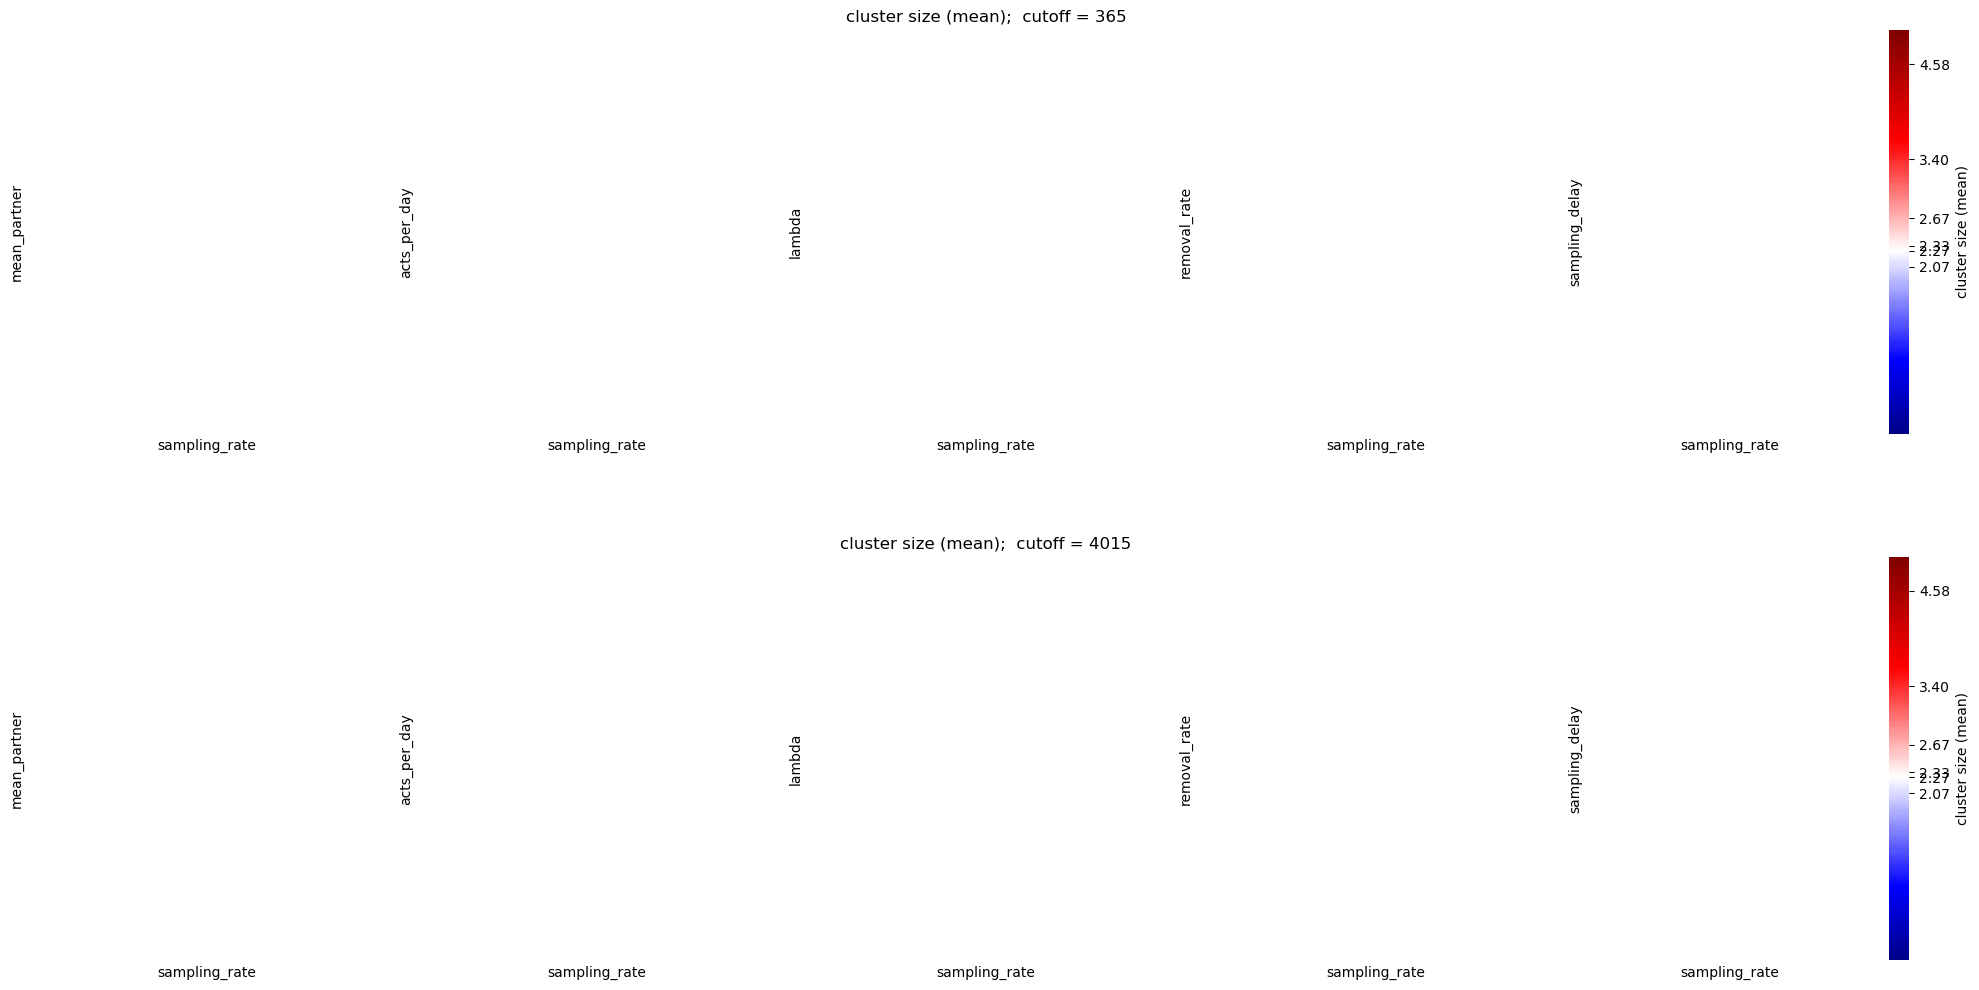

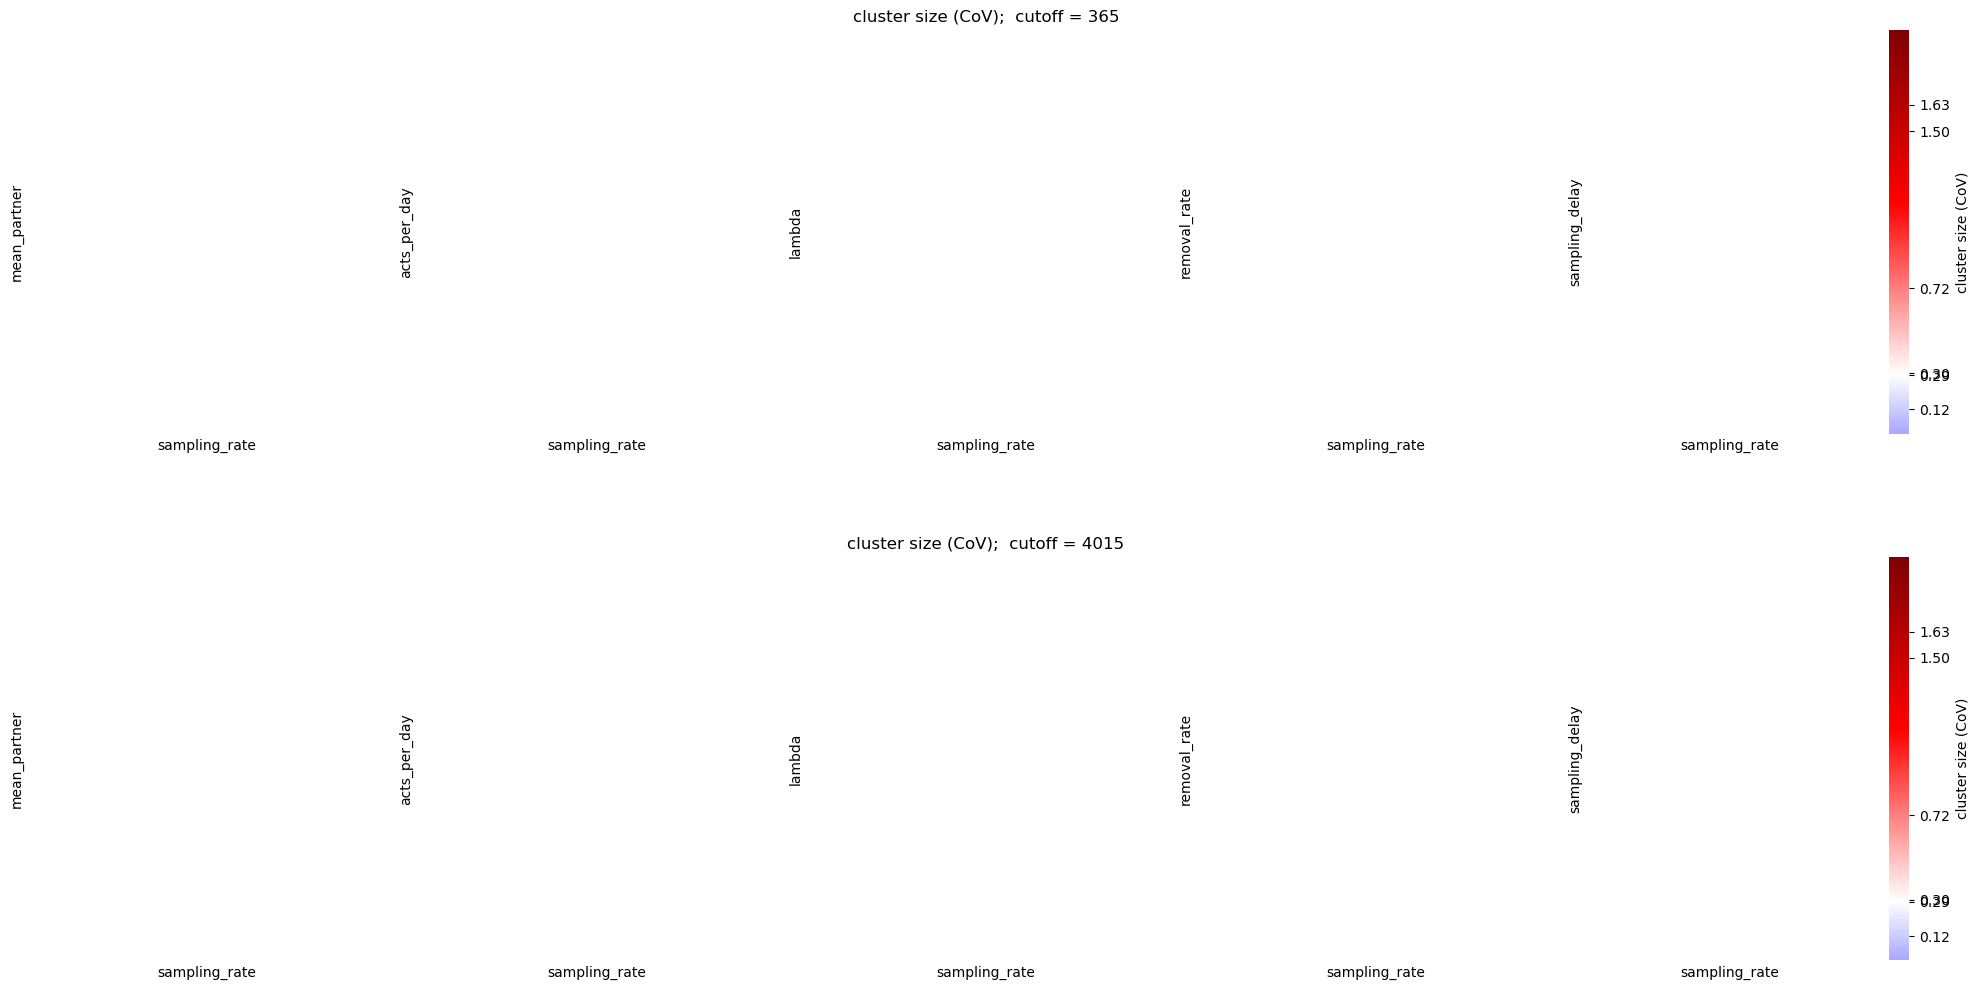

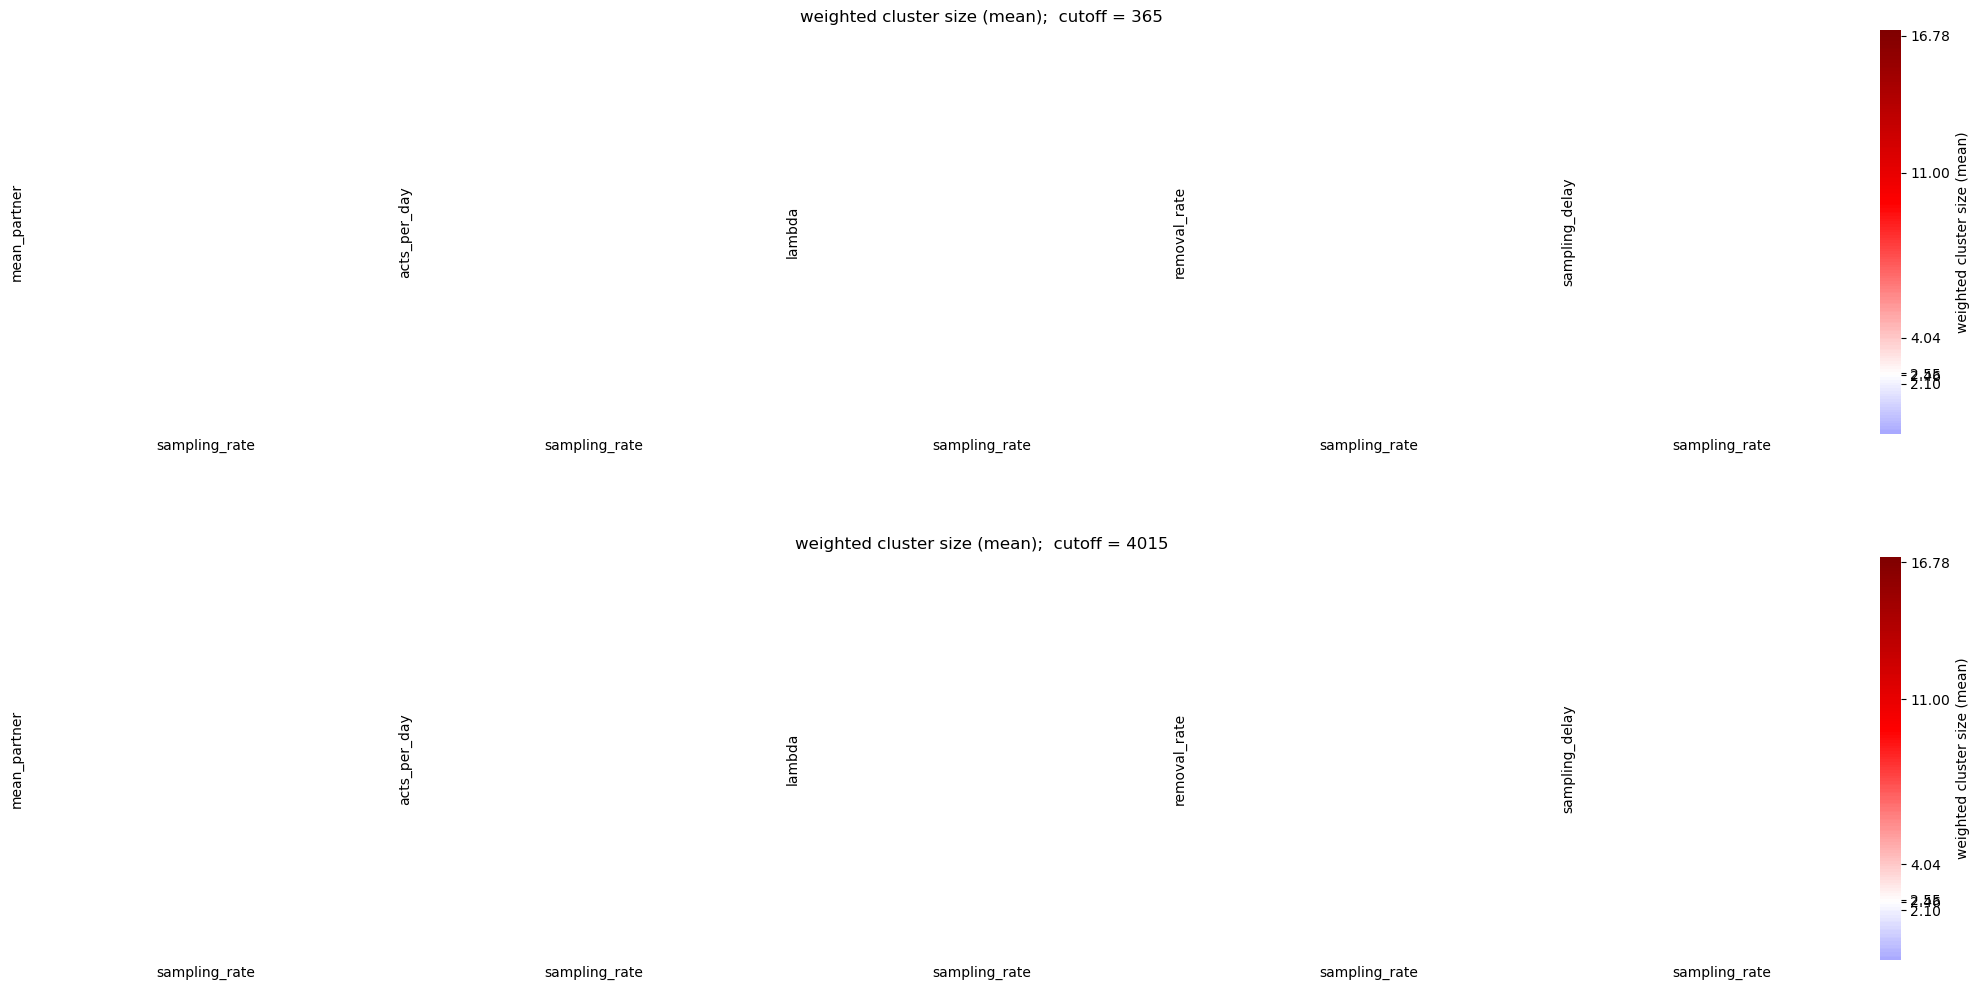

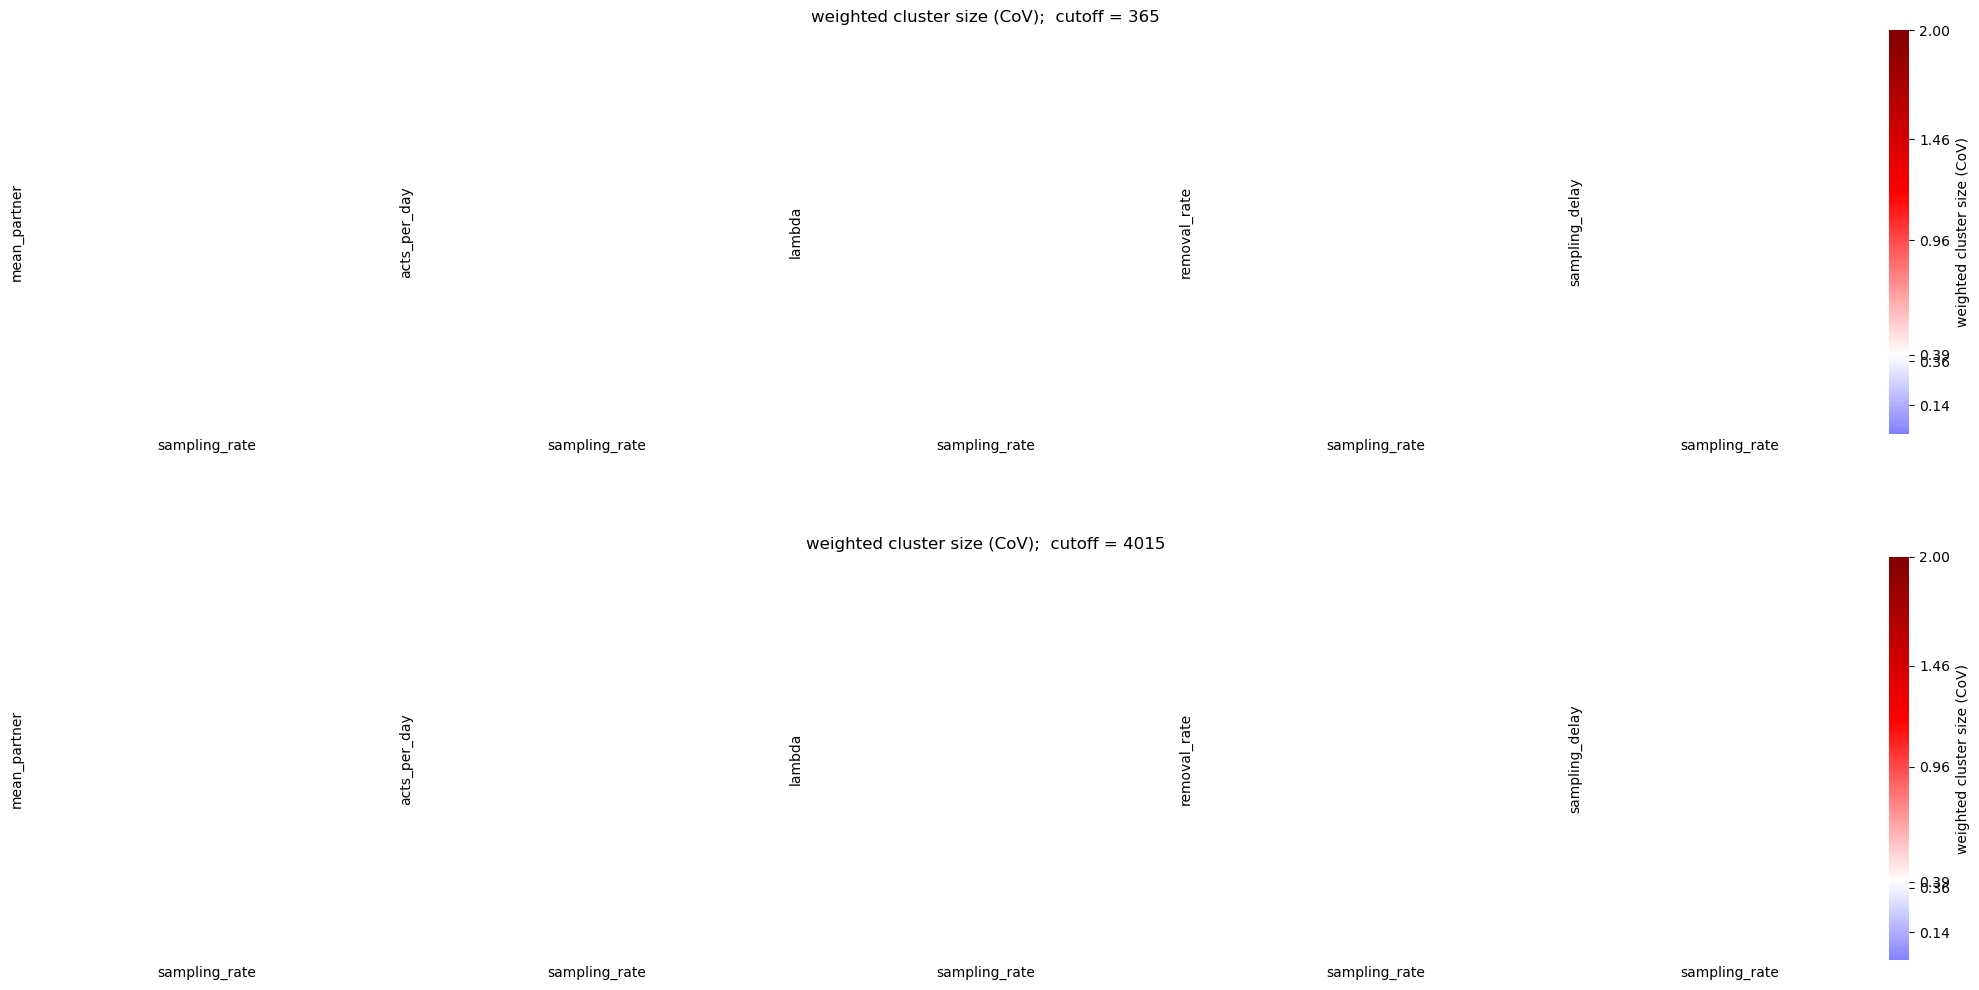

In [12]:
_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'cluster_size_mean',
                                     metric_observations = 'cluster size (mean)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'cluster_size_cov',
                                     metric_observations = 'cluster size (CoV)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'weighted_cluster_size_mean',
                                     metric_observations = 'weighted cluster size (mean)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'weighted_cluster_size_cov',
                                     metric_observations = 'weighted cluster size (CoV)'
                                    )

/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and 

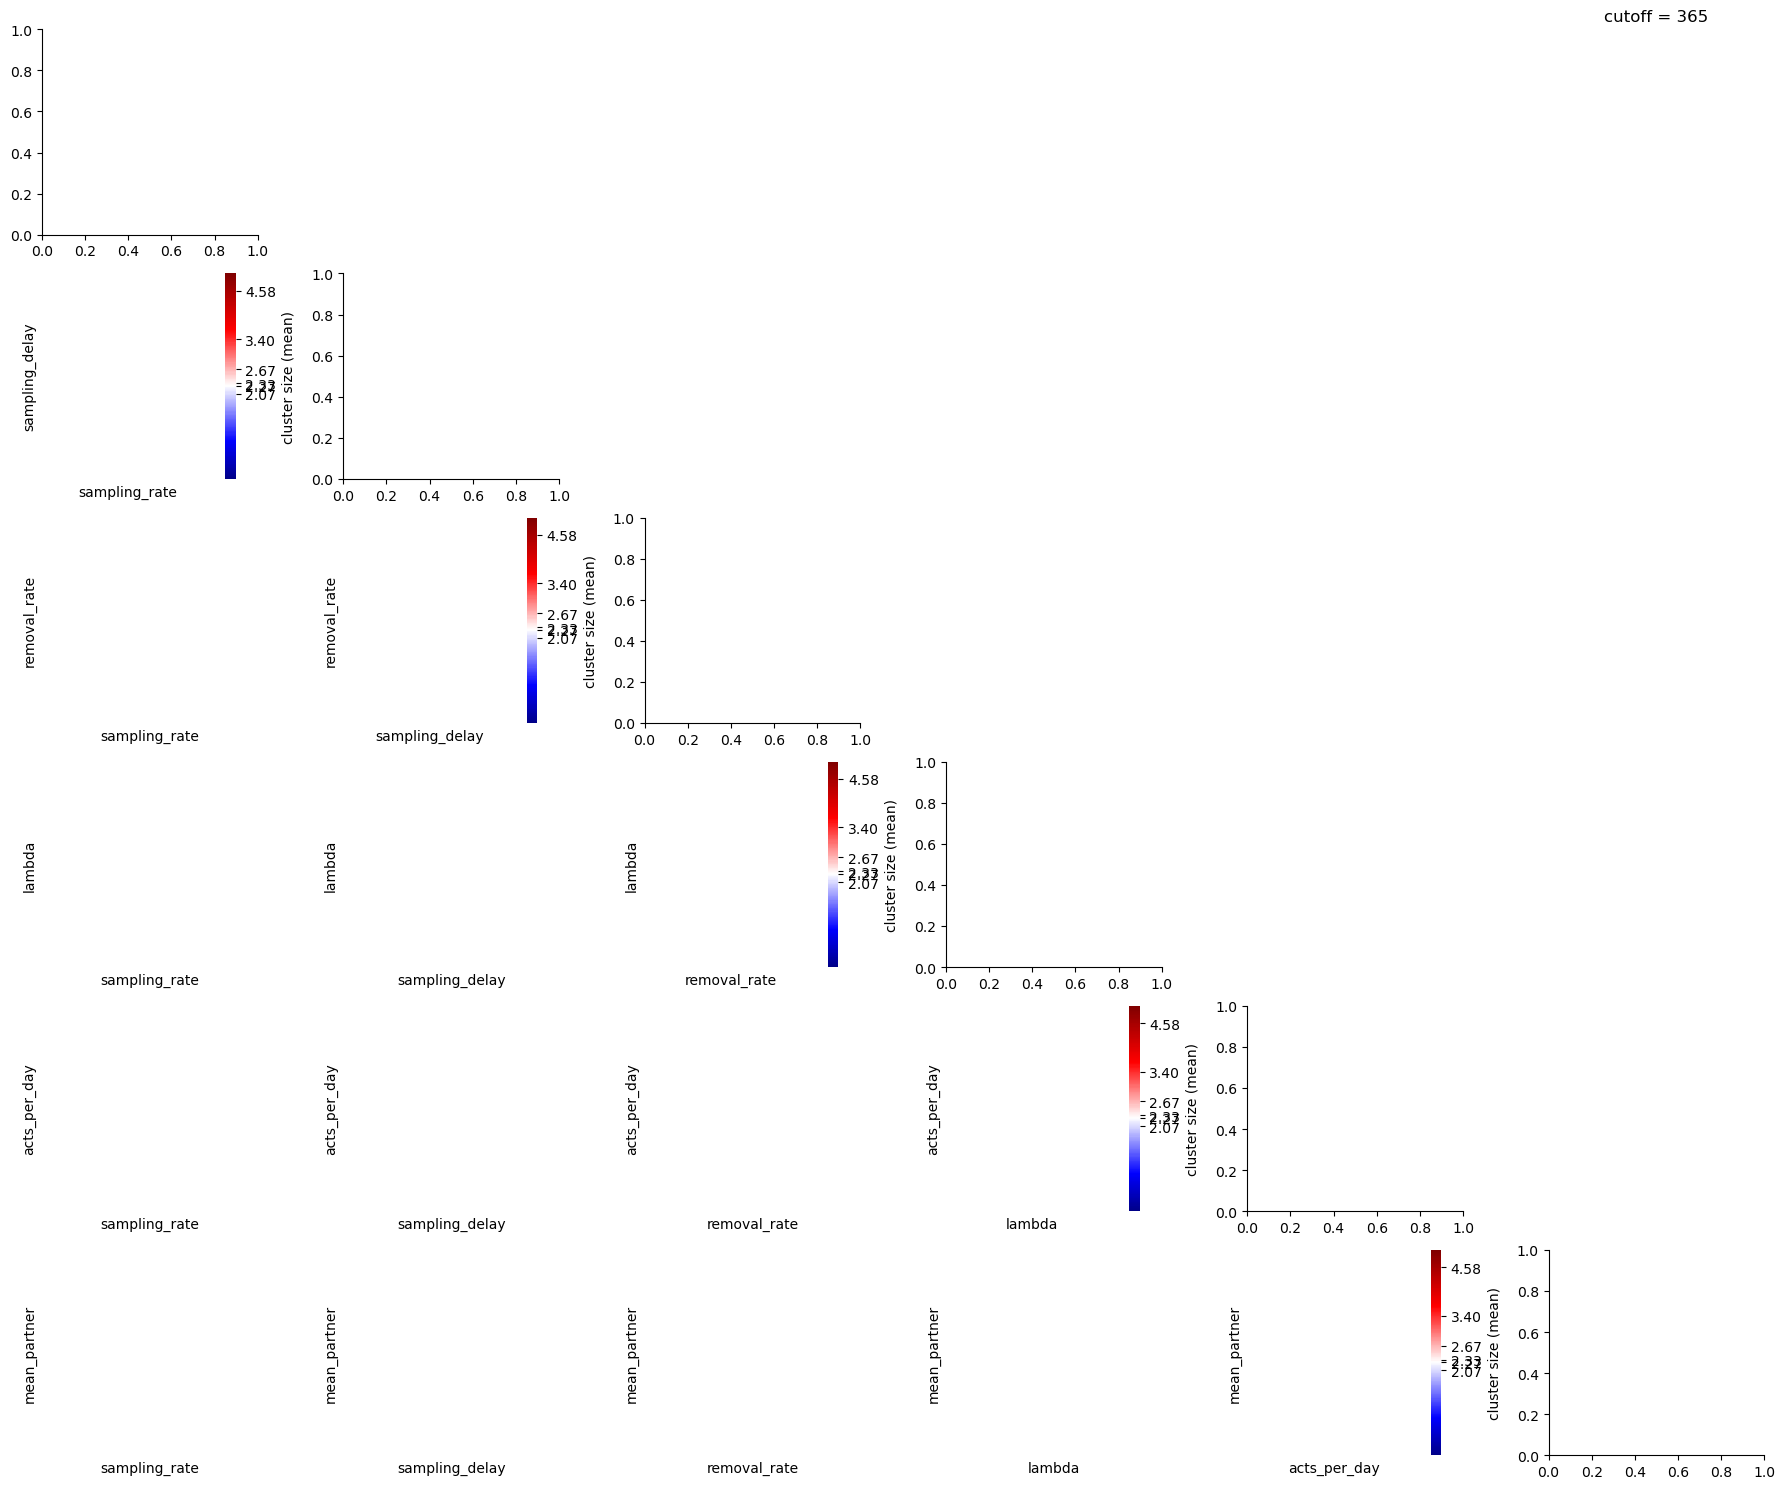

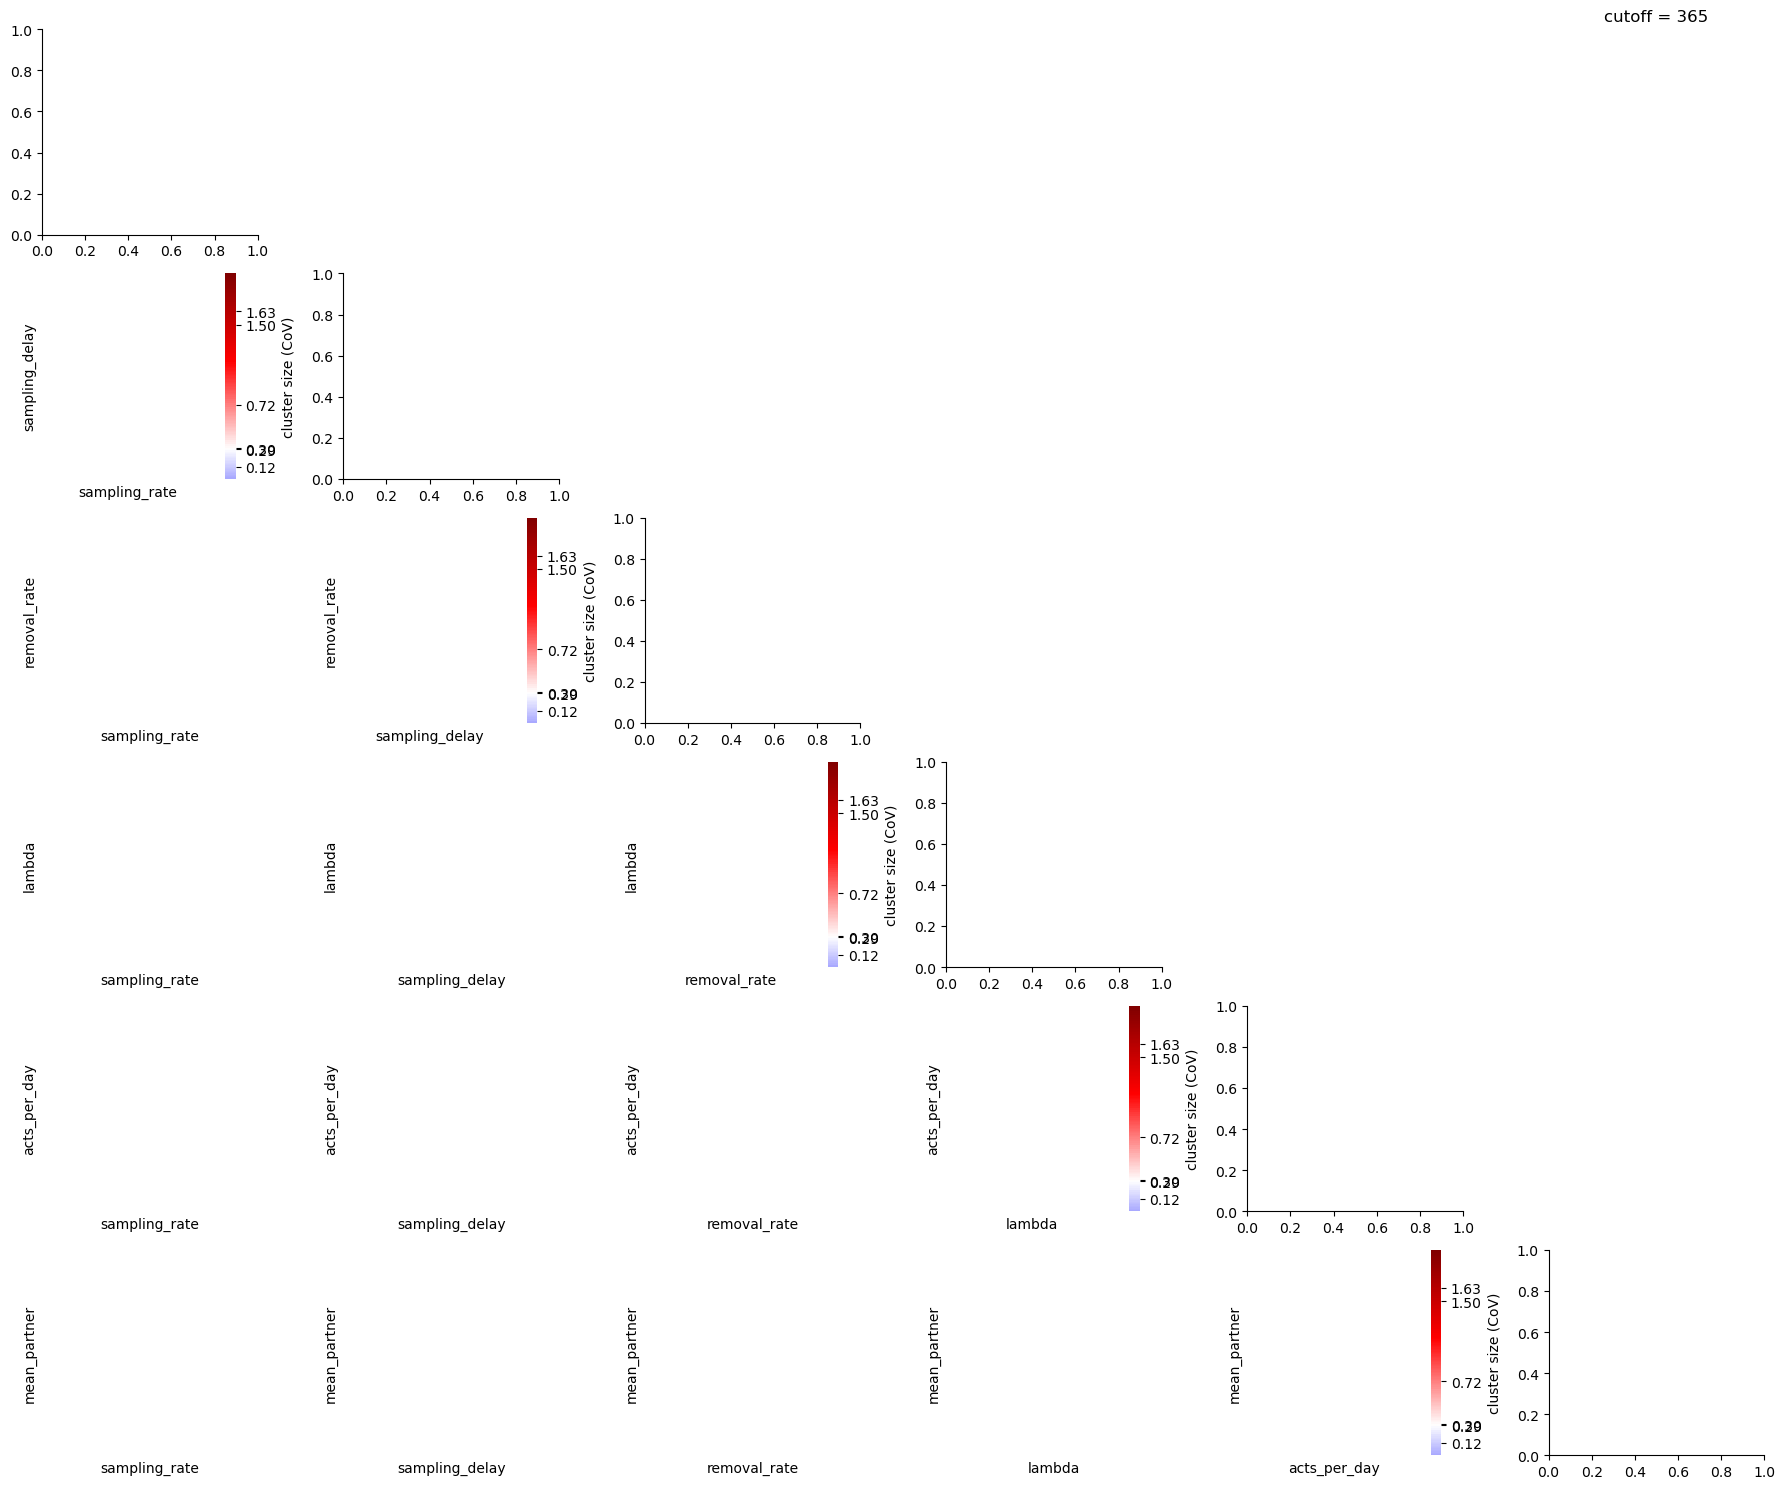

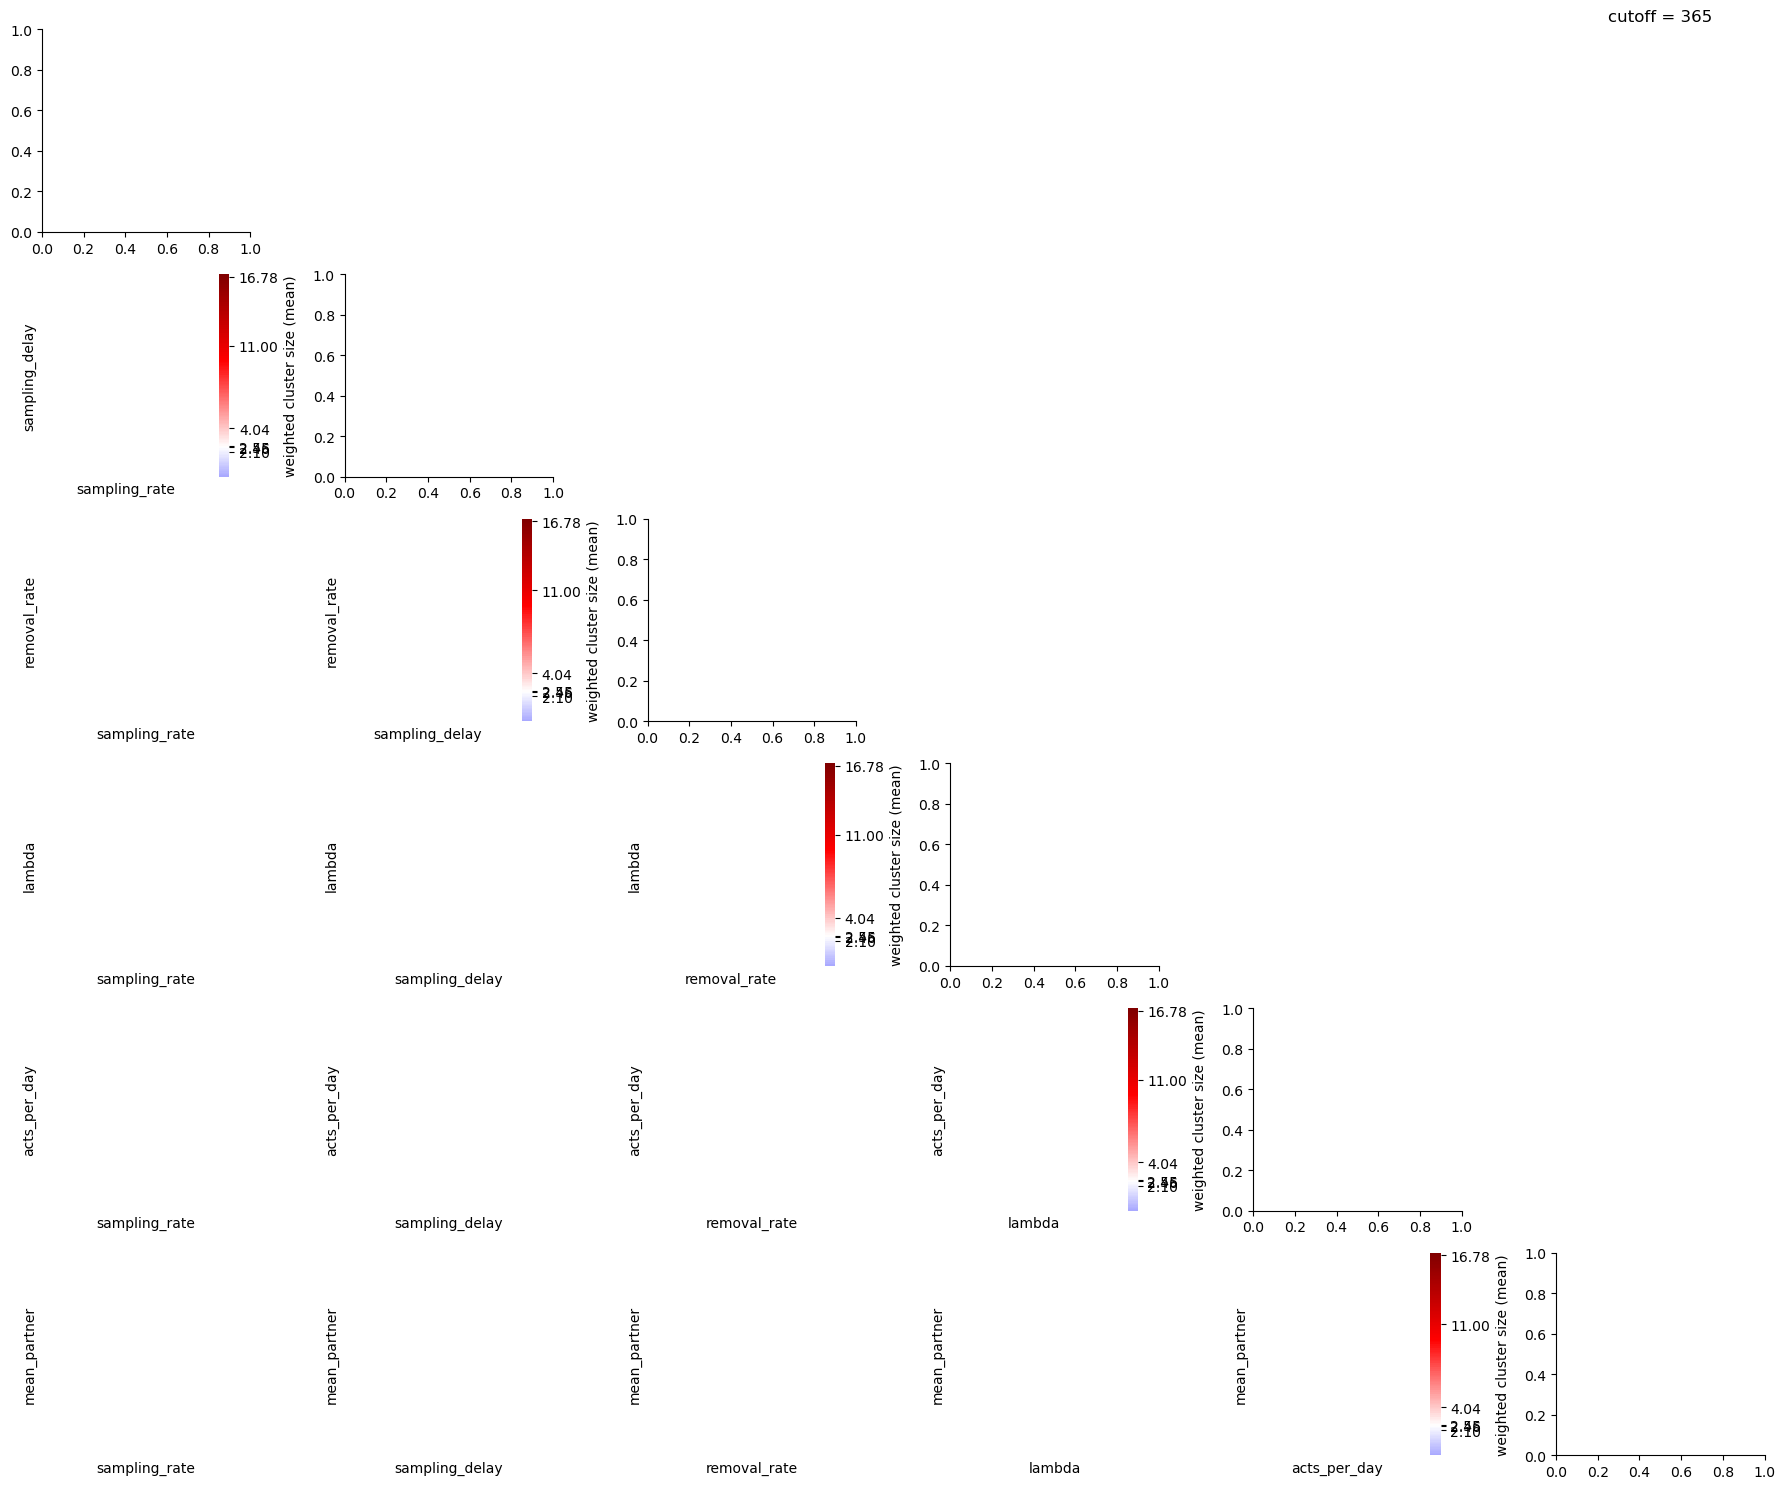

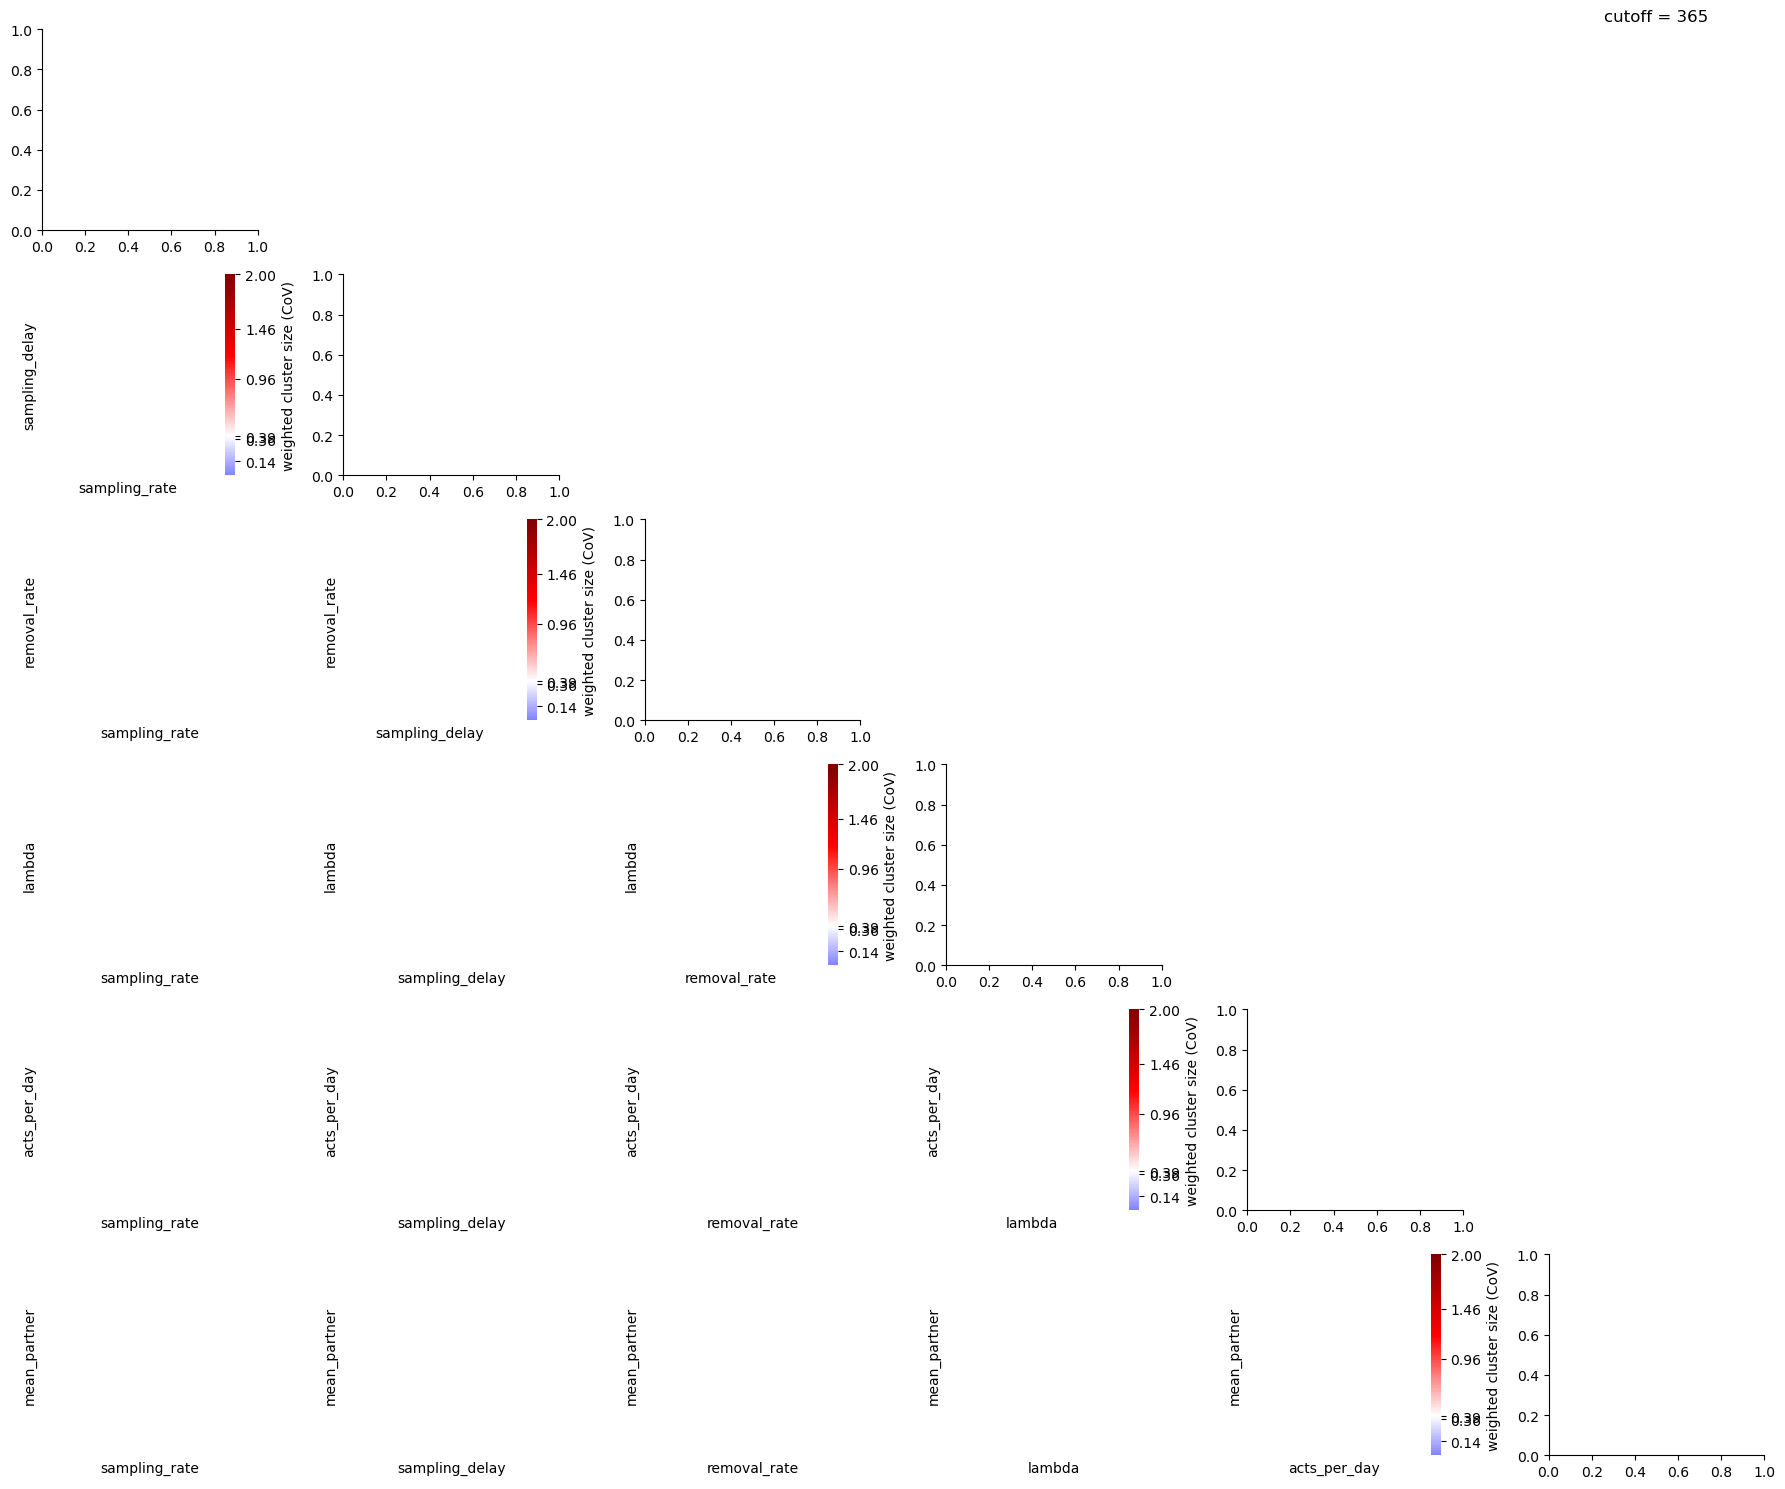

In [13]:
_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'cluster_size_mean',
                         metric_observations = 'cluster size (mean)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'cluster_size_cov',
                         metric_observations = 'cluster size (CoV)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'weighted_cluster_size_mean',
                         metric_observations = 'weighted cluster size (mean)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'weighted_cluster_size_cov',
                         metric_observations = 'weighted cluster size (CoV)'
                       )

## Characterizing the relevant portions of the parametric space

Let's define a function that computes the relative error for a given metric (or group of metrics) in a specific location.  We will consider the portion of the parametric space that has a low relative error (i.e., <10%) as the region of interest (in other words, this is the solution space).

In [14]:
def get_relative_error( results, metrics_results, observation_data, metrics_observations, location ):
    ''' Compute relative error. IMPORTANT: missing experiment data points are not considered
        in the error computations (treated as 0).
    '''

    # Initialization
    n = len( metrics_results )
    if n != len( metrics_observations ):
        print( '... the number of selected metrics is not the same for results and observation data' )
        return
        
    # Compute error
    for i in range(n):
        experiment_data = results[ metrics_results[i] ]
        observations = observation_data[ observation_data['location']==location ][ metrics_observations[i] ].values
        difference = experiment_data - observations
        relative_error = ( abs(difference) / experiment_data ).replace( np.inf, 0 )

        if i==0:
            error = relative_error/n
        else:
            error += relative_error/n
    
    # Finalize and return
    return error

#relative_error = get_relative_error( results, ['cluster_size_mean','reff'], pangea_data, ['cluster size (mean)','R0'], 'PopART, Zambia' )

Now, let's plot the solution space:

/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and 

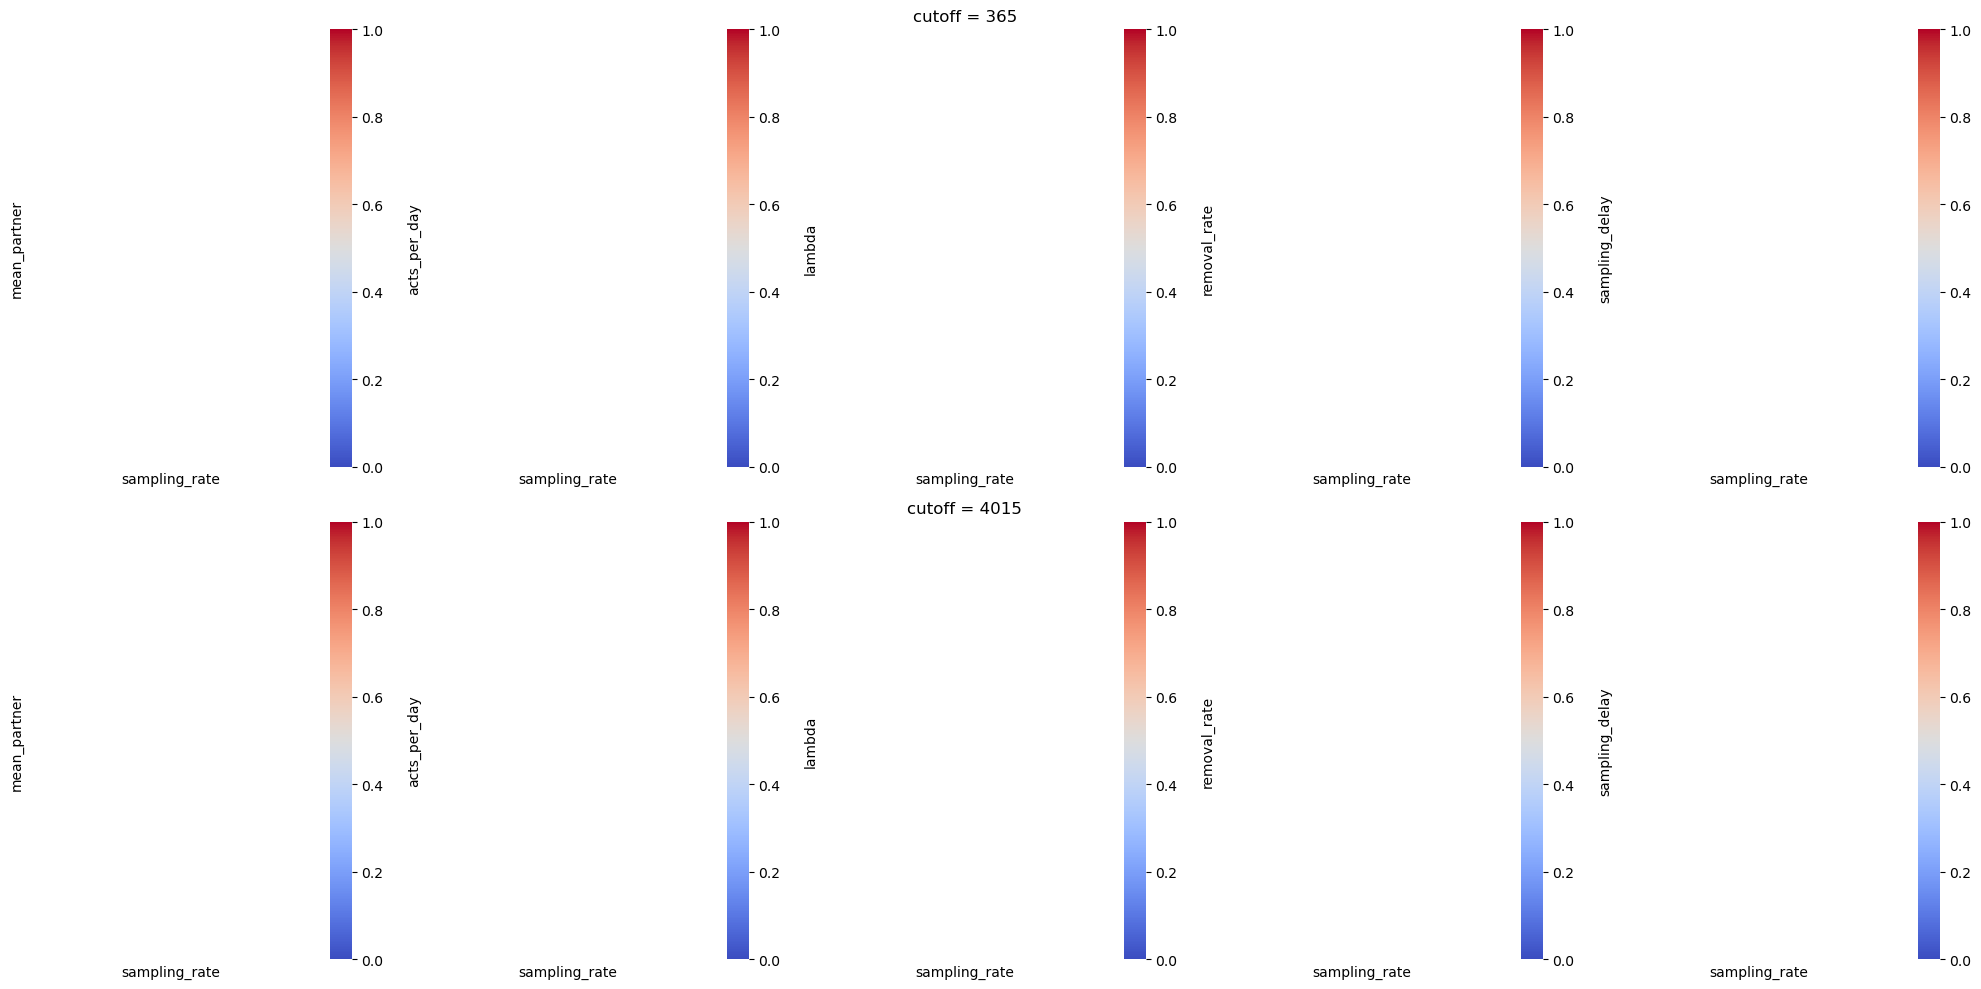

In [15]:
# Define the parameters and cutoffs we are interested in
params = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay' ]
cutoffs = [ 365, 4015 ]
n = len(params)

# Compute the relative error
results['relative_error'] = get_relative_error( results    , ['cluster_size_mean'  , 'reff'], 
                                                pangea_data, ['cluster size (mean)', 'R0'  ], 
                                                location = 'PopART, Zambia' 
                                               )

# Draw the figure
fig_error, axs_error = plt.subplots( len(cutoffs), n, figsize=(20,5*len(cutoffs)) )

cbar_max = results['relative_error'].max()
for j, param_name in enumerate(params):
    data = results.groupby( [param_name, 'cutoff', 'sampling_rate'] ).mean().reset_index()
    for i in range(len(cutoffs)):
        data_cutoff = data[ data['cutoff']==cutoffs[i] ] 
        seaborn.heatmap( data_cutoff.pivot( index   = param_name,
                                            columns = 'sampling_rate',
                                            values  = 'relative_error'
                                           ),
                             vmin = 0,
                             vmax = 1,#cbar_max,
                             cmap = 'coolwarm',
                             ax   = axs_error[i,j]
                           )
        axs_error[i,j].invert_yaxis()
        
for i in range(len(cutoffs)):
    axs_error[i, int(len(params)/2)].set_title( 'cutoff = ' + str(cutoffs[i]) )

fig_error.tight_layout()

/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and 

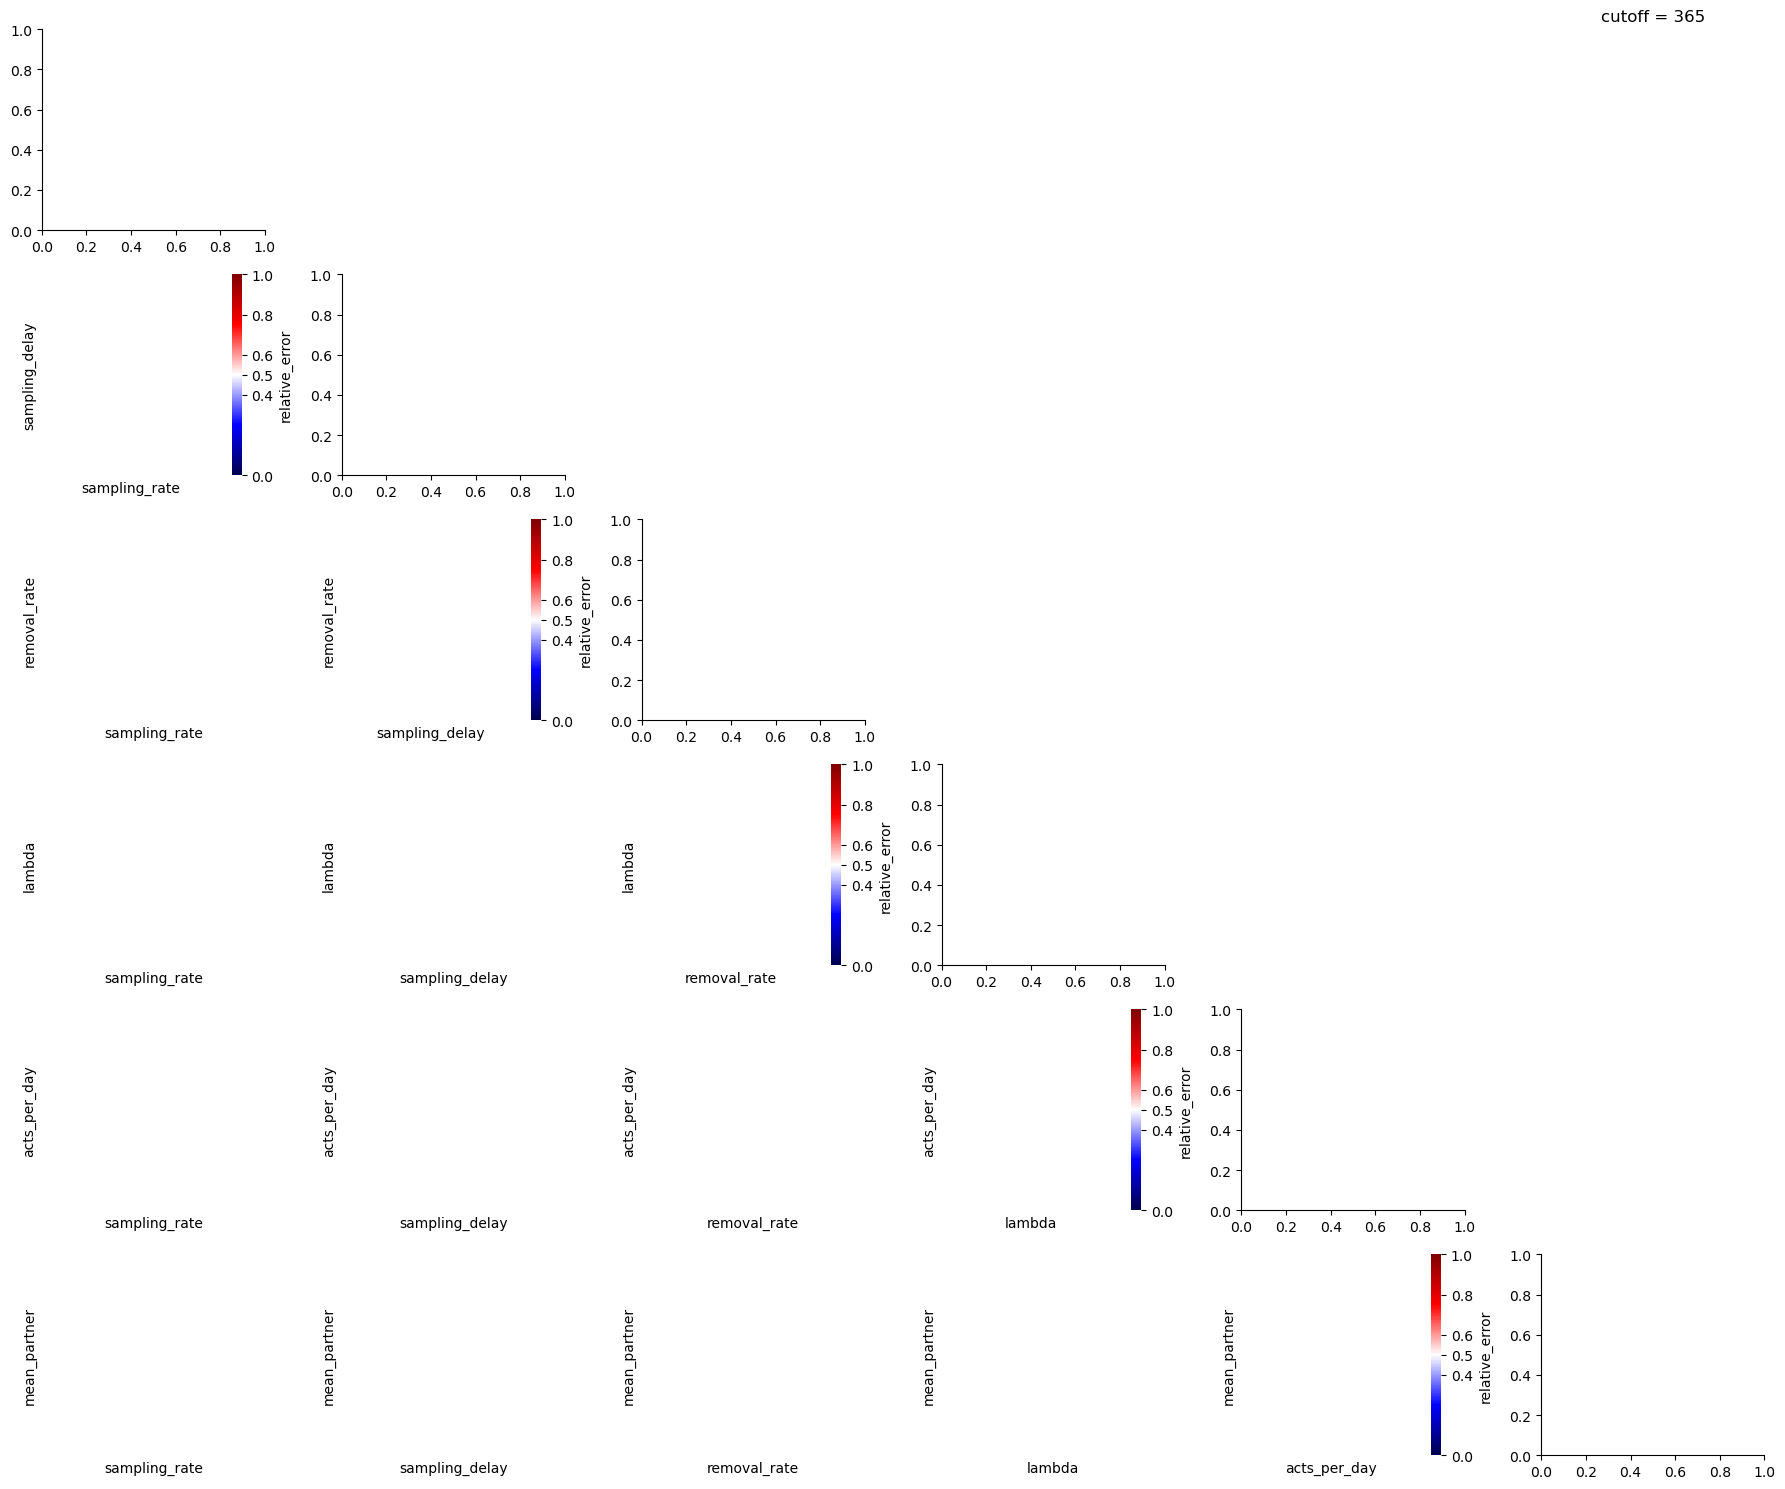

In [16]:
# A little bit of hacking so that we reuse the pairplots figure
observation_error = pangea_data
observation_error['relative_error'] = np.linspace( 0, 1, len(observation_error) )
observation_error.loc[ observation_error['location']==location ,'relative_error'] = 0.5

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'relative_error',
                         metric_observations = 'relative_error'
                       )

Let's try to see the high-dimensional space more clearly.  We do only for the most relevant solutions, which are those combinations of parameters that render less than a certain percentage of relative error.

In [17]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

# Scenario of interest
threshold = 0.1 # maximum relative error, as a rate
cutoff = 365
relevant_results = results[  (results['relative_error']  < threshold) \
                            &(results['cutoff'        ] == 365      ) ]

# Draw the plot
fig = px.parallel_coordinates( relevant_results, 
                               color = 'relative_error', 
                               dimensions = [ 'sampling_rate', 
                                              'removal_rate',
                                              'sampling_delay',
                                              'acts_per_day',
                                              'lambda',
                                              'mean_partner',
                                              'relative_error'
                                             ],
                               color_continuous_scale = px.colors.sequential.BuGn_r,
                               range_color=[0, threshold],
                              #color_continuous_midpoint=0.5
                              )
fig.show()